## Week 2+3. Regularization, Linear Classification, towards Logistic regression

Augustin Cosse

__Material covered:__ Ridge and LASSO regression, linear classification through Multiple Discriminant, OLS and Normal Equations, one-vs-rest and one-vs-one classifiers. Use of the meshgrid function to display the classification boundaries. 

### Example 1. Binary discriminant through OLS and Normal Equations

In this first demo, we will solve the classification problem as follows.

- We first assign 0/1 labels to each of the points (recall that we are in the classification framework so the target now take a finite set of values). That is we define our targets as +1 and 0 depending on whether our points are from the yellow or purple class. This gives a vector 
$$\mathbf{t} = [t^{(1)}, t^{(2)}, \ldots, t^{(N)}]$$

if we have $n$ points

- We then store the sample points in a matrix $\mathbf{X}$ as we did for regression. In this case the points are 2D, we thus have 

$$\mathbf{X} = \left[\begin{array}
(\mathbf{x}^{(1)})^T\\
\mathbf{x}^{(2)})^T\\
\vdots\\
(\mathbf{x}^{(N)})^T
\end{array}\right]$$

where each $\mathbf{x}^{(i)} = \left[\begin{array}{c}
x^{(i)}_1\\
x^{(i)}_2
\end{array}\right]$ now encodes the two coordinates of the corresponding point in the dataset below. We want to learn a model of the form 

$y(\mathbf{x}) = \beta_0 + \beta_1X_1 + \beta_2X_2$ 

that outputs a prediction $y(\mathbf{x}^{(i)})$ that is as close as possible to the target of the point $t^{(i)}$. We will encode this model by adding an additional column of $1$'s to the matrix $\mathbf{X}$ above to get

$$\mathbf{X} = \left[\begin{array}{cc}
1 & (\mathbf{x}^{(1)})^T\\
1& \mathbf{x}^{(2)})^T\\
\vdots  & \vdots\\
1& (\mathbf{x}^{(N)})^T
\end{array}\right]$$
we can then write the model as $\mathbf{y} = \mathbf{X}\mathbf{\beta}$ and we want $\mathbf{y}$ as close as possible to $\mathbf{t}$ (given that what we can achieve is limited by the linearity of the model)

A natural approach, given what we learned so far, is thus to minimize the OLS criterion,

$$\min_{\beta_0, \beta_1, \beta_2} \sum_{i=1}^N \frac{1}{N}|t^{(i)} - (\beta_0 + \beta_1X^{(i)}_1 + \beta_2X^{(i)}_2)|^2$$

As we saw in regression, this model can read in matrix form as 

$$\mathbf{v} = \mathbf{X}\mathbf{\beta} - \mathbf{t}$$

and then 

$$\min_{\mathbf{\beta}}\frac{1}{N}\mathbf{v}^T\mathbf{v} = \min_{\mathbf{\beta}} \left(\mathbf{X}\mathbf{\beta} - \mathbf{t}\right)^T(\mathbf{X}\mathbf{\beta} - \mathbf{t})$$

Instead of using a gradient descent approach, we could alternatively set the derivative of the loss with respect to the weights $\mathbf{\beta}$ to zero and solve the equations. In this case (you can verify it by computing the derivatives with respect to each of the $\beta_j$ and setting them to zero), this gives the set of equations

$$\mathbf{X}^T\left(\mathbf{X}\mathbf{\beta} - \mathbf{t}\right) = 0 \leftrightarrow \mathbf{X}^T\mathbf{X}\mathbf{\beta} = \mathbf{X}^T\mathbf{t}$$

which can solve by using the inverse of $\mathbf{X}^T\mathbf{X}$ as $\mathbf{\beta} = \left(\mathbf{X}^T\mathbf{X}\right)^{-1}\mathbf{X}^T\mathbf{t}$



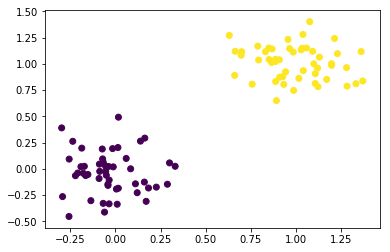

[0.05629461 0.48213025 0.43630057]


In [1]:
# We start by generating data using the make_blobs function from scikit learn. 
# We first consider a two classes dataset. We then learn the discriminant by solving the normal equations

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



X, t = make_blobs(n_samples=100,n_features=2,centers=[[0,0], [1,1]],cluster_std = [.2, .2])

plt.scatter(X[:,0], X[:,1], c = t)
plt.show()

num_samples = X.shape[0]

# 1) Learn the discriminant through the normal equations

sampleMat =  np.hstack((np.ones((num_samples,1)), X))

RHS = np.dot(sampleMat.T,t)
normalMat = np.dot(sampleMat.T, sampleMat)

# beta = (XT*X)^{-1}*(X^t t)
# the line below is just solving the system nomalMat*beta = RHS

beta = np.linalg.solve(normalMat, RHS)

print(beta)


[0. 0. 0. ... 1. 1. 1.]


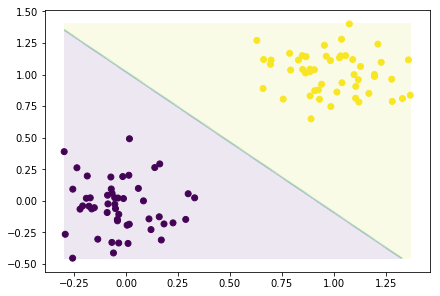

In [3]:
# To represent our model, Now that we have learned the beta, we can divide the space into a grid of equispaced points. 
# Concretely, we first compute the minimum and maximum X1 and X2. Once we have those, we then generate all the 
# points between X1_{min} and X1_{max} on the one hand, as well as between X2_{min} and X2_{max} on the other. Once we 
# have those two vectors, let us call them v1 and v2. Those two vectors contain the X1 coordinates and X2 coordinates 
# of the grid points. 


x1min = np.amin(X[:,0])
x1max = np.amax(X[:,0])

x2min = np.amin(X[:,1])
x2max = np.amax(X[:,1])

x1mesh = np.linspace(x1min, x1max, 100)
x2mesh = np.linspace(x2min, x2max, 100)

# To compute the prediction, we however need to generate all the pairs $(X1, X2)$ for all the points 
# on the grid. This is achieved through the meshgrid function. This function takes as first and second arguments 
# the vectors of X1 and X2 coordinates respectively and returns the X1 and x2 coordinates of all the points on the grid. 
# As an example if we want a grid with X1 = (1,2,3) and X2 = (1,2,3), meshgrid(X1, X2) will return the matrices 
# (1 2 3; 1 2 3; 1 2 3) and (1 1 1; 2 2 2; 3 3 3). 

x1MeshMat, x2MeshMat = np.meshgrid(x1mesh.reshape(-1,1), x2mesh.reshape(-1,1))

# Meshgrid thus gives us the X1 and X2 coordinates 
# of all the points on the grid (nopt just the border). Those coordinates are returned as matrices, so to 
# build the X matrix to compute our prediction, we need to flatten the X1 and X2 meshgrid matrices and then 
# add a column of 1 on top of those coordinates


x1MeshMat = x1MeshMat.flatten()
x2MeshMat = x2MeshMat.flatten()

X12 = np.vstack((x1MeshMat, x2MeshMat)).T

totalNumPointsGrid = len(x1MeshMat)

# generating the additional vector of ones
addon = np.ones((totalNumPointsGrid, 1))

# stacking it to the matrix of prototypes coordinates

pointsGrid = np.hstack((addon.reshape(-1,1), X12))

# Now that we have computed the X matrix, and since we have previously obtained the weights of our discriminant, 
# we can now get the predicted labels for the points over the whole space.

prediction = np.dot(pointsGrid, beta)

# reorganize my targets (according to original values given). Since we chose the targets to be 0 or 1. We classify our 
# points depending on whether the output of the model gives a value larger or smaller than 1/2 

prediction[prediction<.5] = 0
prediction[prediction>.5] = 1

print(prediction)

# To display the class of each point, we will use the function contourf. This function takes as first 
# argument a matrix of X1 coordinates (coordinates of all points on the grid ) and a matrix of X2 coordinates. 
# The reverse of meshgrid if you will.  

coordinatesX1 = np.reshape(x1MeshMat, (100,100))
coordinatesX2 = np.reshape(x2MeshMat, (100,100))
reshaped_prediction = np.reshape(prediction, (100,100))


fig, ax = plt.subplots(constrained_layout=True)
plt.scatter(X[:,0], X[:,1], c = t)
ax.contourf(coordinatesX1, coordinatesX2, reshaped_prediction, alpha=0.1)
plt.show()




### Example 2. From the Binary classifier to multiclass discriminant. 

__Material covered__ : one vs rest, one vs one, multiclass discriminant, one hot encoding  

In [30]:
print(np.shape(coordinates_grid))

print(np.shape(np.ones((numSamplePoints, 1))))

(10000, 2)
(100, 1)


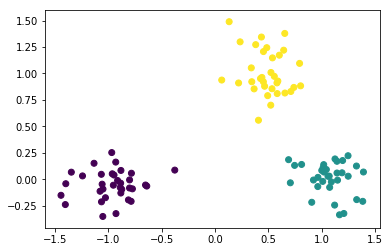

(array([0]),)


In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



X, t = make_blobs(n_samples=100,n_features=2,centers=[[-1,0], [1,0], [.5, 1]],cluster_std = [.2, .2, .2])

plt.scatter(X[:,0], X[:,1], c = t)
plt.show()

# we first consider a 3 classes problem for which we code the one vs rest and one vs one classifiers 

K = 3
dim = 2
numSamplePoints = X.shape[0]

# 1) one vs rest 

target = np.zeros((numSamplePoints,K))
Xtilde = np.hstack((np.ones((numSamplePoints, 1)), X))
beta = np.zeros((dim+1, K)) 


                   
for i in np.arange(0, K):

    target[np.where(t==i), i] = 1
    beta[:,i] = np.dot(np.linalg.inv(np.dot(Xtilde.T, Xtilde)), np.dot(Xtilde.T, target[:,i]))
                   
                   
                

# plotting and generating the grid 
x1min = np.amin(X[:,0])
x1max = np.amax(X[:,0])
x2min = np.amin(X[:,1])
x2max = np.amax(X[:,1])

x1mesh = np.linspace(x1min, x1max, 100) 
x2mesh = np.linspace(x2min, x2max, 100)

X1meshMat, X2meshMat = np.meshgrid(x1mesh, x2mesh) 

coordinates_grid  = np.vstack((X1meshMat.flatten(), X2meshMat.flatten())).T
coordinates_tilde = np.hstack((np.ones((np.shape(coordinates_grid)[0], 1)),coordinates_grid ))
                   
# getting the predictions
                   
out_classifier = np.zeros((np.shape(coordinates_grid)[0],K))
indClassification = np.zeros((np.shape(coordinates_grid)[0], K))
        
    
target_out_total = np.zeros((np.shape(coordinates_grid)[0], 1))

for i in np.arange(0, K):
                   
    out_classifier[:,i] = np.dot(coordinates_tilde, beta[:,i])
    indClassification[np.where(out_classifier[:,i]>0.5),i] = 1
    target_out_total[np.where(out_classifier[:,i]>0.5)] = i

                   
# looking for overlaps

misclassification = np.sum(indClassification, axis=1)

ind_misclassified1 = np.where(misclassification>1)  
ind_misclassified2 = np.where(misclassification==0)


target_out_total[ind_misclassified1] = K
target_out_total[ind_misclassified2] = K

print(ind_misclassified)

 

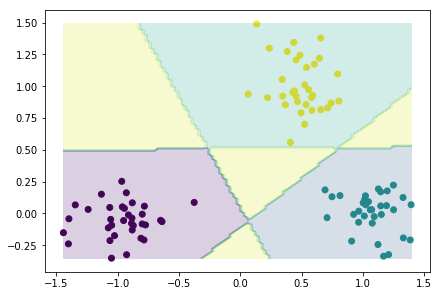

In [75]:
                
# plotting the resulting classifier

fig, ax = plt.subplots(constrained_layout=True)
plt.scatter(X[:,0], X[:,1], c = t)    
ax.contourf(X1meshMat, X2meshMat, target_out_total.reshape((100,100)), alpha=0.2)
plt.show()      

# The representation below also shows that the classifier cannot properly classify some regions in 
# the (x_1, x_2) space (show in yellow). For those regions, points are either classified as belonging to 
# multiple classes (such as in the center) or they are do not get any label at all (such as the triangles on the border)


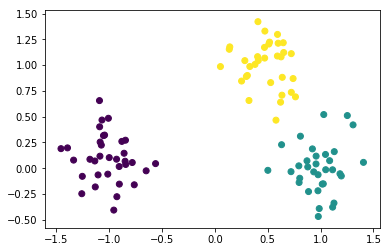

In [111]:
# I now code the one vs one classifier. We still consider the three classes dataset from above    

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, t = make_blobs(n_samples=100,n_features=2,centers=[[-1,0], [1,0], [.5, 1]],cluster_std = [.2, .2, .2])
plt.scatter(X[:,0], X[:,1], c = t)
plt.show()

# we first consider a 3 classes problem for which we code the one vs rest and one vs one classifiers 

K = 3
dim = 2
numSamplePoints = X.shape[0]



Xtilde = np.hstack((np.ones((numSamplePoints, 1)),X))

# we will sore our beta vectors in a 3D array


beta_tensor = np.zeros((K,K, 3))



# generating the grid (we will classify the points from the grid in real time)
x1min = np.amin(X[:,0])
x1max = np.amax(X[:,0])
x2min = np.amin(X[:,1])
x2max = np.amax(X[:,1])

x1mesh = np.linspace(x1min, x1max, 100) 
x2mesh = np.linspace(x2min, x2max, 100)

X1meshMat, X2meshMat = np.meshgrid(x1mesh, x2mesh) 

coordinates_grid  = np.vstack((X1meshMat.flatten(), X2meshMat.flatten())).T
coordinates_tilde = np.hstack((np.ones((np.shape(coordinates_grid)[0], 1)),coordinates_grid ))
      
# define vector counting the votes for each point

count = np.zeros((np.shape(coordinates_grid)[0], K))

for i in np.arange(0, K):
    
    for j in np.arange(0,K):
        
        if i > j:
            
            
            XtildeLocal = Xtilde[np.squeeze(np.hstack((np.where(t==i), np.where(t==j)))), :]
            tlocal = t[np.squeeze(np.hstack((np.where(t==i), np.where(t==j))))] 
            tlocal2 = np.zeros(np.shape(tlocal))
            tlocal2[tlocal == i] = 1 # here we do i vs j
            tlocal2[tlocal == j] = 0
            
            beta_ij = np.dot(np.linalg.inv(np.dot(XtildeLocal.T, XtildeLocal)), np.dot(XtildeLocal.T, tlocal2))
            
            beta_tensor[i,j, :] = beta_ij
            beta_tensor[j,i, :] = beta_ij
            
            
            prediction = np.dot(coordinates_tilde,beta_ij)
            ind_i = np.where(prediction > 0.5)
            ind_j = np.where(prediction < 0.5)
            count[ind_i, i] += 1
            count[ind_j, j] += 1
            
            
            
# Now that we have all the beta, we compute each of the regions. We will proceed through a majority vote. 
# That is we start by getting all the labels for each of the binary classifiers. And we add one each time a point 
# is classified in a given class



count_final = np.squeeze(np.zeros((np.shape(coordinates_grid)[0], 1)))

for i in np.arange(np.shape(coordinates_grid)[0]):
    count_final[i] = np.argmax(count[i,:])
    

    
# add a few lines highlighting the regions where points are classified at random



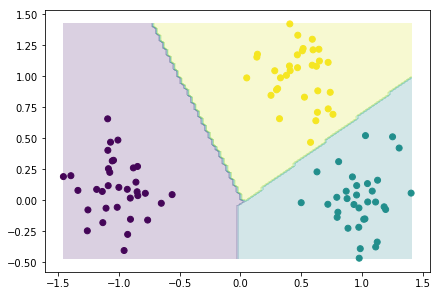

In [112]:
# plotting the resulting classifier

fig, ax = plt.subplots(constrained_layout=True)
plt.scatter(X[:,0], X[:,1], c = t)    
ax.contourf(X1meshMat, X2meshMat, count_final.reshape((100,100)), alpha=0.2)
plt.show()      

# note that here although the plot does not show it, we can have regions in space that get the same 
# number of votes and there is thus also some form of ambiguity. When taking the max of the votes, in case of an 
# equality numpy selects an index at random which is why it is not visible on the plot.  


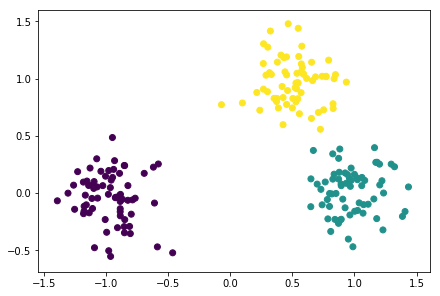

(100, 1)
(100, 2)


In [142]:
# To conclude, we consider a K class discriminant function. We still consider the 3 classes example from above 
# In this case, the first step is to encode the 
# each of the targets through a 1-hot encoding. We have 

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

X, t = make_blobs(n_samples=100,n_features=2,centers=[[-1,0], [1,0], [.5, 1]],cluster_std = [.2, .2, .2])
plt.scatter(X[:,0], X[:,1], c = t)
plt.show()

# we first consider a 3 classes problem for which we code the one vs rest and one vs one classifiers 

K = 3
dim = 2
numSamplePoints = X.shape[0]


oneHotEncodingT = np.zeros((len(t),K))
oneHotEncodingT[np.arange(0,len(t)), t] = 1


vec_ones = np.ones((numSamplePoints, 1))
# As before, we build the matrix Xtilde by adding a column of 1 to X. 


print(np.shape((np.ones((np.shape(X)[0],1)))))
print(np.shape(X))
         
         

Xtilde = np.hstack((np.ones((np.shape(X)[0],1)), X))

# we then solve the matrix system Xtilde*BETA = T (here both X and BETA are matrices)

solutionBeta = np.dot(np.linalg.inv(np.dot(Xtilde.T, Xtilde)), np.dot(Xtilde.T, oneHotEncodingT))

# if you print the shape of the matrix you now see that this matrix has size numClasses*3 so that we 
# now have 3 weight vectors. If we apply this weight matrix to the meshgrid data, as we did before, 

x1min = np.amin(X[:,0])
x1max = np.amax(X[:,0])
x2min = np.amin(X[:,1])
x2max = np.amax(X[:,1])

x1mesh = np.linspace(x1min, x1max, 100) 
x2mesh = np.linspace(x2min, x2max, 100)

X1meshMat, X2meshMat = np.meshgrid(x1mesh, x2mesh) 

Xmeshgrid = np.vstack((X1meshMat.flatten(), X2meshMat.flatten()))

XmeshgridTilde = np.hstack((np.ones((np.shape(Xmeshgrid.T)[0],1)),Xmeshgrid.T ))


prediction_grid  = np.dot(XmeshgridTilde, solutionBeta)


# From this, we can then define our class to be the index of the row that gives the highest value for t[i,j], for each column j
# the columns corresponding to the dataset points

final_classificationTargets = np.squeeze(np.zeros((np.shape(prediction_grid)[0],1)))

for i in np.arange(0, len(final_classificationTargets)):
    
    final_classificationTargets[i] = np.argmax(prediction_grid[i,:])

# Now we display the prediction using contourf




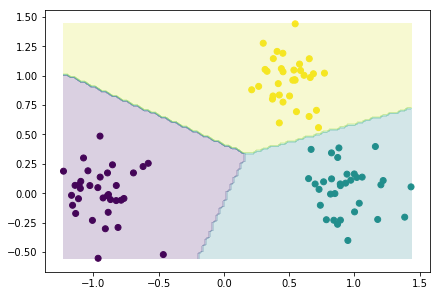

In [143]:
# plotting the resulting classifier

fig, ax = plt.subplots(constrained_layout=True)
plt.scatter(X[:,0], X[:,1], c = t)    
ax.contourf(X1meshMat, X2meshMat, final_classificationTargets.reshape((100,100)), alpha=0.2)
plt.show() 

In [ ]:
# we are now guaranteed to predict a single class for each of the points from our dataset 
# (except if our classifier outputs twice the same value which is quite unlikely). 
# The OLS classifier which we used throughout the various steps above is however not robust to outliers. 

### Example 2. The sigmoid function 

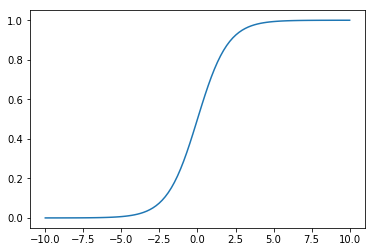

In [145]:
# to resolve the lack of robustness of the OLS classifier vis a vis outliers, we can consider an additional 
# non linear function which should return approximately the same value regardless of the distance of a point to 
# the separating plane. This means that we would like the function to return a value alpha_0 when the output to the 
# OLS classifier is positive and a value alpha1 when the output to the classifier is negative. A further improvement 
# can be achieved if we could 'force' those values to be 0 and 1. In this case taking the decision regarding the 
# classes becomes a lot easier. As we will see, this is what the sigmoid will approximately give us. 

# From the two figures below, you can see that the sigmoid always return a value between 0 and 1 and it 
# quickly saturates as we move aways from 0. 


x = np.linspace(-10,10, 100)

sigmoid  = np.true_divide(1, 1+np.exp(-x))

plt.plot(x, sigmoid)
plt.show()




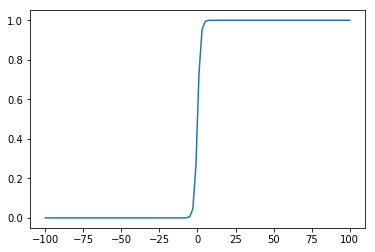

In [146]:


x = np.linspace(-100,100, 100)

sigmoid  = np.true_divide(1, 1+np.exp(-x))

plt.plot(x, sigmoid)
plt.show()

